In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


Text(0.5, 1.0, 'Histogram of Log Solubility')

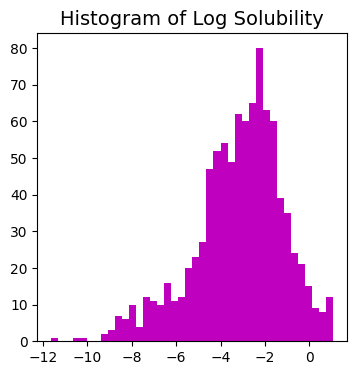

In [3]:
sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", verbose=False)
print(sol.shape)
print(sol.columns)
t = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(t, bins=40, facecolor='m')
ax.set_title("Histogram of Log Solubility", fontsize=14)

In [4]:
# Slice the feature columns
X = sol.iloc[:, 5:]  # Slice columns from index 5 to the end
X.drop(X.columns[-1], axis=1, inplace=True)
N, p = X.shape
print(X.shape)
print(t.shape)
X

(932, 2255)
(932,)


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,Depressant-50,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80
0,180.22,8.192,15.623,21.854,16.296,24.242,0.710,0.993,0.741,1.102,...,0,0,0,0,0,1,0,1,0,1
1,146.17,8.598,11.612,17.291,11.784,19.408,0.683,1.017,0.693,1.142,...,0,0,0,0,0,0,0,0,0,0
2,146.17,8.598,11.612,17.291,11.784,19.408,0.683,1.017,0.693,1.142,...,0,0,0,0,0,0,0,0,0,0
3,146.17,8.598,11.612,17.291,11.784,19.408,0.683,1.017,0.693,1.142,...,0,0,0,0,0,0,0,0,0,0
4,162.17,9.009,12.327,18.618,12.239,20.618,0.685,1.034,0.680,1.145,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,188.25,7.240,16.392,25.949,17.273,29.282,0.630,0.998,0.664,1.126,...,0,0,0,0,0,1,0,1,0,1
928,215.72,7.704,16.569,28.251,17.693,32.512,0.592,1.009,0.632,1.161,...,0,0,0,1,0,1,0,1,0,1
929,232.26,8.009,18.821,29.604,19.182,32.701,0.649,1.021,0.661,1.128,...,0,0,0,1,0,1,1,1,0,1
930,233.11,9.713,16.047,24.596,16.989,27.170,0.669,1.025,0.708,1.132,...,0,0,0,0,0,1,0,1,0,1


In [5]:
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

In [6]:
# Regularized regression
#
gamma = 2.3
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w.to_numpy()
th_test = X_test @ w.to_numpy()

In [7]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(t_train, th_train)
mse_test = mean_squared_error(t_test, th_test)

Text(0.05, 0.9, 'MSE: 0.83')

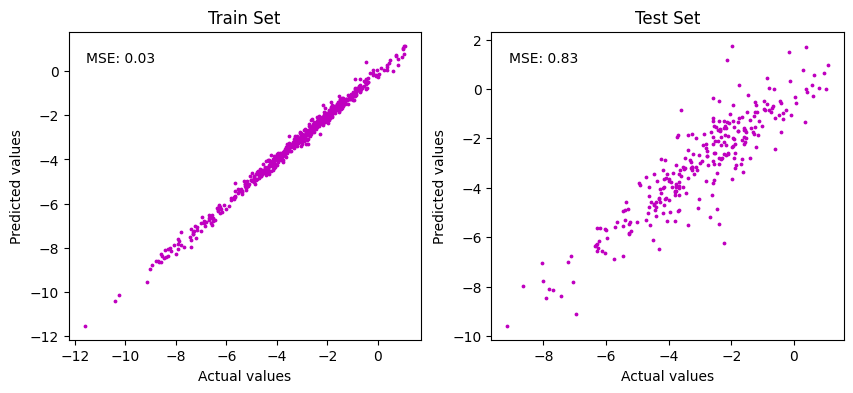

In [8]:
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_train, c='m', s=3)
ax[0].set_title('Train Set')
ax[0].set_xlabel('Actual values')
ax[0].set_ylabel('Predicted values')

ax[1].scatter(t_test, th_test, c='m', s=3)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Actual values')
ax[1].set_ylabel('Predicted values')

# Annotating MSE values
ax[0].annotate(f"MSE: {mse_train:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)
ax[1].annotate(f"MSE: {mse_test:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)


(10,)
(10,)
(652, 10)


Text(0.05, 0.9, 'MSE: 1.16')

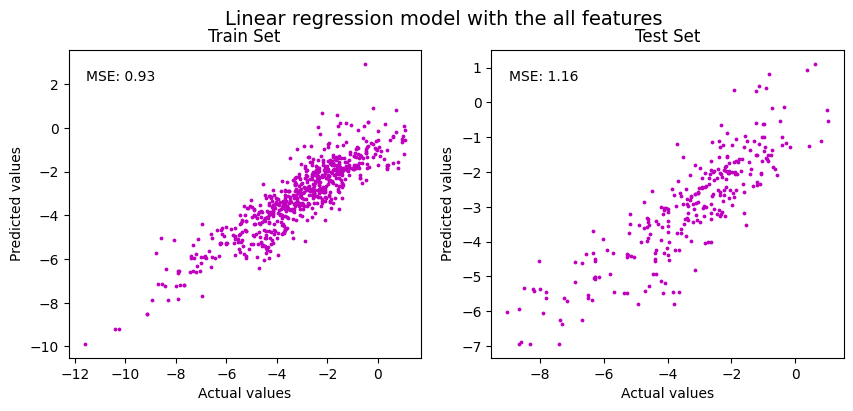

In [21]:
from sklearn.linear_model import Lasso

ll = Lasso(alpha=0.2)
ll.fit(X_train, t_train)
th_lasso_train = ll.predict(X_train)
w_lasso = np.concatenate((ll.coef_), axis=None)

print(w.shape)
print(w_lasso.shape)

print(X_train.shape)

th_train = X_train @ w_lasso
th_test = X_test @ w_lasso

# find mean square error
mse_train_lasso = mean_squared_error(t_train, th_train)
mse_test_lasso = mean_squared_error(t_test, th_test)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_lasso_train, c='m', s=3)
ax[0].set_title('Train Set')
ax[0].set_xlabel('Actual values')
ax[0].set_ylabel('Predicted values')

ax[1].scatter(t_test, th_test, c='m', s=3)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Actual values')
ax[1].set_ylabel('Predicted values')

# Annotating MSE values
ax[0].annotate(f"MSE: {mse_train_lasso:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)
ax[1].annotate(f"MSE: {mse_test_lasso:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)

Text(0.5, 1.0, 'Lasso regularization solution')

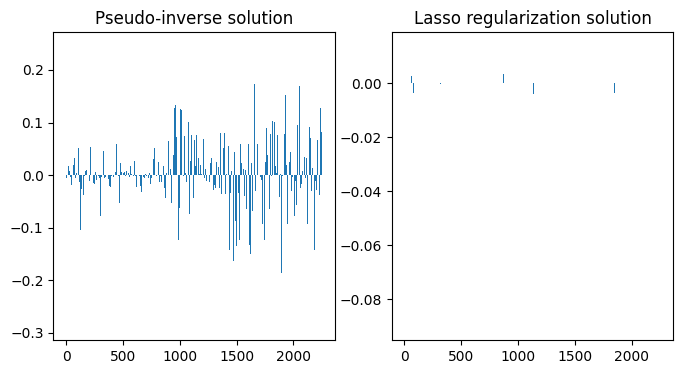

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(w)), w)
ax[0].set_title('Pseudo-inverse solution')

ax[1].bar(np.arange(len(w_lasso)), w_lasso)
ax[1].set_title('Lasso regularization solution')

In [11]:
no_of_coefficient = w_lasso.shape
print(no_of_coefficient[0])

non_zero_coefficients = []

for i in range(no_of_coefficient[0]):
    if(w_lasso[i] != 0.001):
        non_zero_coefficients.append(w_lasso[i])
        
print(non_zero_coefficients)
        


2255
[-0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0020409722949859695, 0.0026977697253155325, 0.0, -0.0, -0.002786206831618686, -0.001625502401872469, 0.0018984069013375366, 0.0, 0.0, 0.0, 0.0040414583662992075, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0028809755478523876, 0.0, -0.0037321636975469344, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0062701353345323485, -0.0, -0.0, -0.0, -0.0, 0.00015796857089389444, -0.0, -0.0, 0.00022055221209928898, -6.0984077469221434e-06, 8.259646802207359e-05, -2.776523560330617e-05, -0.0, -0.0044027451612359955, 3.6090729657045963e-06, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0

In [12]:
feature_names = sol.columns.tolist()

coefficients_with_names = zip(feature_names, w_lasso)

# Sort the coefficients based on their values in descending order
sorted_coefficients = sorted(coefficients_with_names, key=lambda x: abs(x[1]), reverse=True)

# Extract the largest 10 coefficients and their corresponding feature names
largest_coefficients = sorted_coefficients[:10]

print("Largest coefficients and their corresponding feature names:")
for feat_name,coef in largest_coefficients:
    print("Coefficient:", coef, "- Feature Name:", feat_name)


Largest coefficients and their corresponding feature names:
Coefficient: -0.08992239814790676 - Feature Name: Hy
Coefficient: -0.05994536460509746 - Feature Name: C-040
Coefficient: -0.025658856631939952 - Feature Name: CATS2D_05_NL
Coefficient: 0.013706909116385078 - Feature Name: IC3
Coefficient: -0.009672411340336121 - Feature Name: ALOGP
Coefficient: 0.009492160168132298 - Feature Name: T(S..Cl)
Coefficient: -0.0062701353345323485 - Feature Name: Pol
Coefficient: 0.005122186730133863 - Feature Name: IC1
Coefficient: -0.0050553760739051766 - Feature Name: P_VSA_m_5
Coefficient: 0.0049862727151746096 - Feature Name: SpMin6_Bh(s)


In [13]:
top_ten_features = []

for feat_name in largest_coefficients:
    top_ten_features.append(feat_name[0])

print(top_ten_features)

['Hy', 'C-040', 'CATS2D_05_NL', 'IC3', 'ALOGP', 'T(S..Cl)', 'Pol', 'IC1', 'P_VSA_m_5', 'SpMin6_Bh(s)']


In [14]:
extracted_data = sol[top_ten_features]


extracted_data

,Hy,C-040,CATS2D_05_NL,IC3,ALOGP,T(S..Cl),Pol,IC1,P_VSA_m_5,SpMin6_Bh(s)
0,-0.835,0,0,3.789,2.203,0,22,2.300,0.0,0.000
1,-0.614,0,0,3.690,-0.006,0,15,2.940,0.0,0.000
2,-0.614,0,0,3.690,-0.333,0,14,2.778,0.0,0.000
3,-0.614,0,0,3.808,-0.006,0,14,2.940,0.0,0.000
4,-0.565,0,0,3.795,0.234,0,17,3.086,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
927,-0.766,1,0,3.921,1.620,0,20,3.061,0.0,0.178
928,0.686,0,0,3.869,2.536,0,16,2.717,0.0,0.000
929,0.468,2,0,3.978,1.321,0,31,3.286,0.0,0.073
930,-0.096,0,0,3.772,2.481,0,18,3.292,0.0,0.000


In [15]:
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(extracted_data, t, test_size=0.3)

In [16]:
# Regularized regression
#
N, p = extracted_data.shape
gamma = 2.3
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w.to_numpy()
th_test = X_test @ w.to_numpy()

In [17]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(t_train, th_train)
mse_test = mean_squared_error(t_test, th_test)

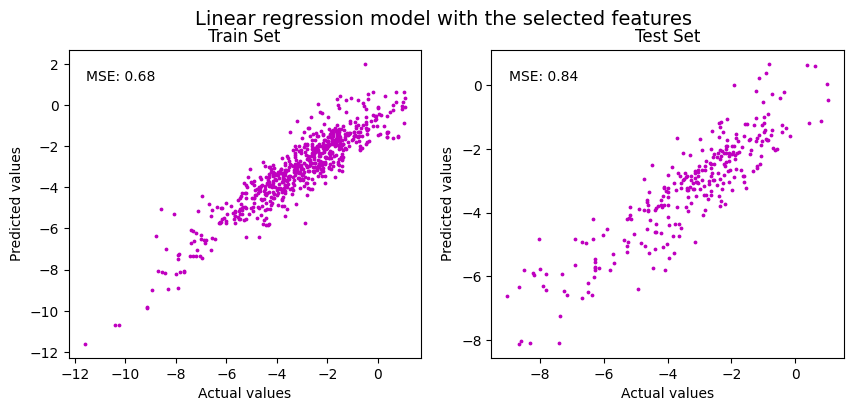

In [19]:
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle('Linear regression model with the selected features', fontsize=14)  # Main title for both plots

ax[0].scatter(t_train, th_train, c='m', s=3)
ax[0].set_title('Train Set')
ax[0].set_xlabel('Actual values')
ax[0].set_ylabel('Predicted values')

ax[1].scatter(t_test, th_test, c='m', s=3)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Actual values')
ax[1].set_ylabel('Predicted values')

# Annotating MSE values
ax[0].annotate(f"MSE: {mse_train:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)
ax[1].annotate(f"MSE: {mse_test:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)

plt.show()
